# Video Game Sales

## Abstract

Video Game Sales in North America compared to critic score were used to determine whether a correlation could be made between them. There a correlation however small. The reults showed that the higher the critic score the higher than sales of such games. This also showed that sales are not always based on critic scores such as when critic scores are 0 and sales reach to about 30 sales.

## Introduction

The data used consist of mainly sales of video games from three major parts of the would and a total of those sales. The sales data can be used to determine how sales will occoure in the future by using critic and user scores from different games.

## Research Questions

Deterime the projected sales in North America compared to global sales.

## EDA

Anaylsis of the data from [kaggle.com](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)

In [56]:
# libraries used in this report
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# retrieving and displaying the data for this project
df = pd.read_csv("../data/Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# columns of the data being used
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
# checking data type of each column and the amount of data consisted in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.6+ MB


## Cleaning Data

Needed to get rid of the NaN in 6 columns.
Change column, User_Score, from oject to a numerical data type.
checking data for anything else that might need to be changed.
Checking various portions of the data for any other issues.

In [7]:
# getting rid of NaN
df['Critic_Score'] = df['Critic_Score'].replace('nan', np.nan).fillna(0)
df['Critic_Count'] = df['Critic_Count'].replace('nan', np.nan).fillna(0)
df['User_Score'] = df['User_Score'].replace('nan', np.nan).fillna(0)
df['User_Count'] = df['User_Count'].replace('nan', np.nan).fillna(0)
df['Developer'] = df['Developer'].replace('nan', np.nan).fillna('')
df['Rating'] = df['Rating'].replace('nan', np.nan).fillna('')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0,0.0,,
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0,0.0,,


In [8]:
# object to numerical data type
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       14294 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(10), object(6)
memory usage: 1.7+ MB


In [72]:
# checking various methods
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,14294.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,33.566003,12.829595,3.783343,73.648245
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,35.817714,18.679793,3.719995,386.695153
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,0.000000,0.000000,4.300000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,21.000000,7.600000,20.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [73]:
# checking numerical count for column Name
df['Name'].value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
FIFA 14                         9
Ratatouille                     9
Madden NFL 07                   9
                               ..
ATV Offroad Fury 2              1
Defender II                     1
Assault: Retribution            1
Paperboy / Rampage              1
Mario Kart: Super Circuit       1
Name: Name, Length: 11562, dtype: int64

In [74]:
# Same thing in Platform
df['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

## Feature Engineering

Testing the data was done with a series of plots and linear regression to astertain the projections of how sales are affected by crtics scoring in the video game industry.

## Modeling

Using histograms to see how each numerical data is represented.
Then a scatter plot for NA_Sales and Global_Sales.
Using a linear line to show slope and intercept.

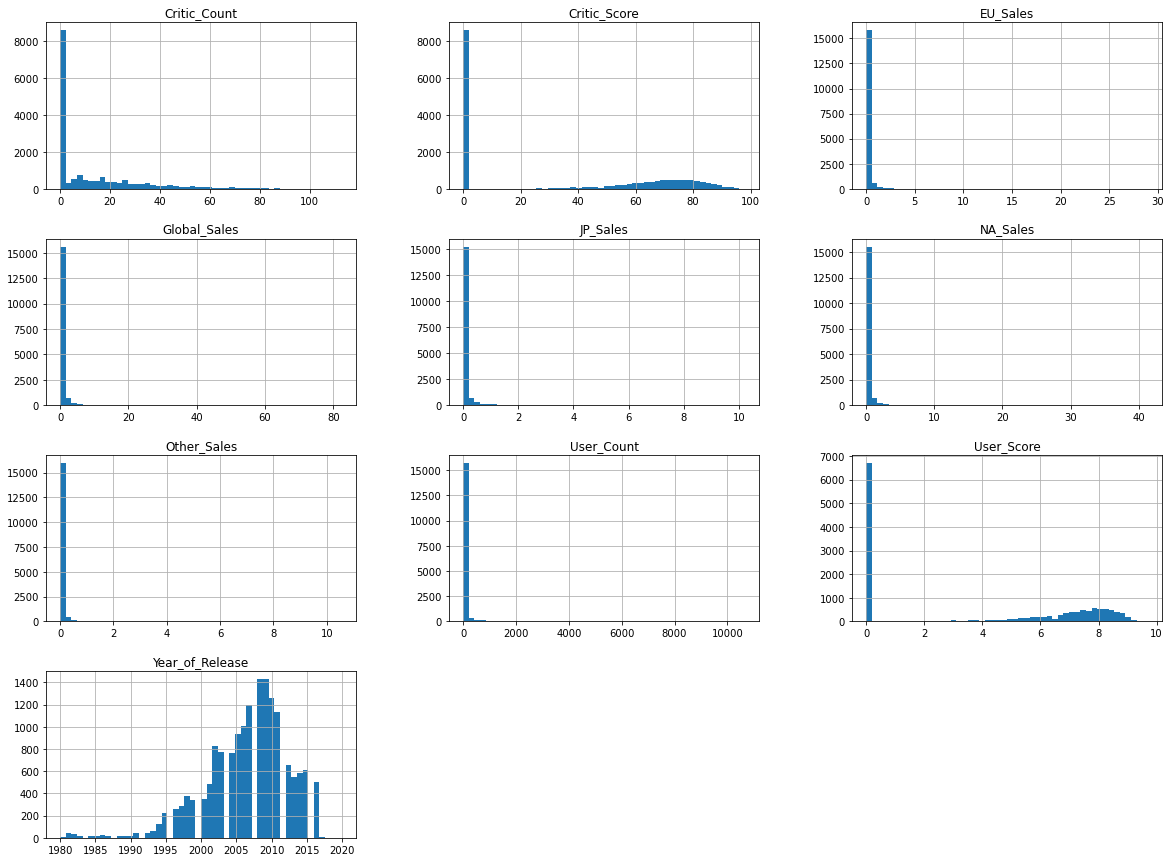

In [34]:
# Histogram graphs for each numerical column
df.hist(bins=50, figsize=(20,15))
plt.savefig("../graphs/histogram_plots.jpg")
plt.show()

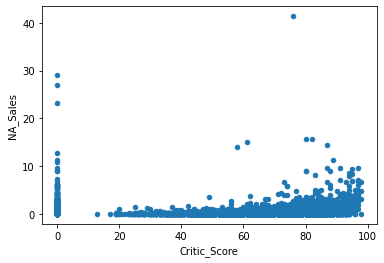

In [35]:
# Scatter plot
df.plot(kind="scatter", y="NA_Sales", x="Critic_Score")
plt.savefig("../graphs/scatter_plot.jpg")
plt.show()

From the plot above it shows that Norht American sale look to be smaller when the critic scores are high with a few outliers. It also shows that even with critic scores are zero sales can be high.

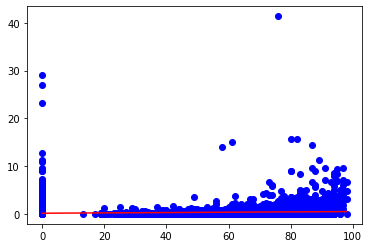

In [79]:
# linear fit of slope and intercept
crit = crit
na = na
gradient, intercept, r_value, p_value, std_err = stats.linregress(crit,na)
mn=np.min(crit)
mx=np.max(crit)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(crit,na,'ob')
plt.plot(x1,y1,'-r')
plt.savefig("../graphs/linefit_plot.jpg")
plt.show()

Since the data in the plot above does not grow by much, slop is closer to being zero.

In [80]:
# setting up data for linear regression and having it fit the model
lr = LinearRegression()
X = df[['Critic_Score']]
y = df.NA_Sales
lr.fit(X, y)

LinearRegression()

In [67]:
# OLS Regression
X = df[['Critic_Score', 'NA_Sales']]
y = df.NA_Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.868e+32
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:23:38   Log-Likelihood:             5.3149e+05
No. Observations:               16719   AIC:                        -1.063e+06
Df Residuals:                   16716   BIC:                        -1.063e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.436e-15   4.04e-17    -35.521      0.000   -1.52e-15   -1.36e-15
Critic_Score  7.866e-17   8.26e-19     95.189      0.000     7.7e-17    8.03e-17
NA_Sales         1.0000   3.64e-17   2.75e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    25164.229   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42943488.397
Skew:                           8.777   Prob(JB):                         0.00
Kurtosis:                     250.663   Cond. No.                         69.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is much greater than begin less than 1. However, the Prob(F-statistic) is 0.

In [68]:
# predictions of the data
print(res.predict(X.loc[13].values), y.loc[13])
X.loc[13]

[8.92] 8.92


const            1.00
Critic_Score    80.00
NA_Sales         8.92
Name: 13, dtype: float64

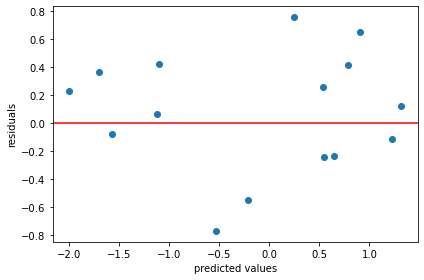

In [85]:
# residual and predicted vaules along with a linear fit
residuals = res.resid
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.savefig("../graphs/regression_plot.jpg")
plt.tight_layout()

In [81]:
# using the residual and predicted vaules
ncols = 14
nrows = 15
X = np.zeros(shape = (nrows,ncols))
for i in range(ncols):
    X[:,i] = np.random.normal(size = nrows)
    
y = np.random.normal(size = nrows)

In [82]:
# modified OLS Regression results
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                 -0.805
Method:                 Least Squares   F-statistic:                    0.5197
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.811
Time:                        14:07:19   Log-Likelihood:                -8.2855
No. Observations:                  15   AIC:                             44.57
Df Residuals:                       1   BIC:                             54.48
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8056      1.336      1.352      0.4

C:\Users\cappy\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The out come from the residual and predicted values are less than 1 in regression.

## Model Evaluation & Selection

The data that was gathered shows a correlation between the North American Sales and the Critic Scores of video games was not vary large due to the many outliers in the data.

## Conlusion

The video game sales data used with linear regression show a correltaion between North American Sales and Critic Scores was vary small. The correlation showed that the higher the critic score the higher the sales were. However, this is not always the case as seen that when the critic scores zero the sales was close to 30 or so sales on games with the same ratings. The data and process can be refined to get a more accurate prodiction on a correlation between the two data segments used from the original data set.